In [7]:
import matplotlib.pyplot as plt
import pandas as pd

from skimage.feature import hog
from skimage import data, exposure, io

from joblib import Parallel, delayed

In [8]:
threads = 6
subset = 'test'

folder = "..\\data\\"
file =  subset + "\\" + subset + ".csv"

df = pd.read_csv(folder + file,sep=",")
df.head()

,observationid,mediaid,vote,content,classid,family,genus,species,author,date,location,latitude,longitude,yearinclef,observationid2014,imageid2014,learntag
0,36886,99451,4.0,Flower,8534,Ranunculaceae,Aconitum,Aconitum napellus L.,thierry pernot,1800-1-1,NaN,NaN,NaN,PlantCLEF2014,208.0,22422.0,Train
1,31390,71276,3.0,Flower,2394,Cistaceae,Cistus,Cistus albidus L.,herve goeau,2013-6-5,Paris,48.84059,2.36158,PlantCLEF2014,2338.0,43988.0,Train
2,38327,61697,4.0,Flower,493,Asteraceae,Bellis,Bellis perennis L.,alexis joly,2014-3-8,Clermont-L'Hérault,43.64690,3.38675,PlantCLEF2015,NaN,NaN,Train
3,5105,34873,4.0,Flower,661,Asteraceae,Cichorium,Cichorium intybus L.,liliane roubaudi,2013-9-13,Fleury,NaN,NaN,PlantCLEF2014,3130.0,20340.0,Train
4,18307,56154,4.0,Flower,588,Asteraceae,Centaurea,Centaurea jacea L.,liliane roubaudi,2014-9-5,Vézins-de-Lévézou,NaN,NaN,PlantCLEF2015,NaN,NaN,Train


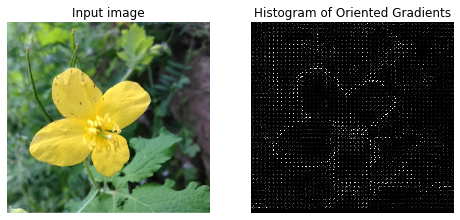

In [9]:
# Example
image = io.imread(folder + 'train\\1321.jpg')

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [10]:
def to_hog(filename):
    image = io.imread(filename)
    fd = hog(image, orientations=8, pixels_per_cell=(10, 10),
             cells_per_block=(1, 1), multichannel=True, feature_vector=True)
    return fd

In [11]:
loadpath = folder + 'resized\\' + subset + '\\'
features = Parallel(n_jobs=threads)(delayed(to_hog)(loadpath + str(i) + '.jpg') for i in df['mediaid'])

In [12]:
pd.DataFrame(features).to_csv(loadpath + subset + "_hog.csv", index=False)